<a href="https://colab.research.google.com/github/sojung519/deeplearning_pytorch/blob/main/2_%EC%8B%A4%EC%8A%B5%ED%99%98%EA%B2%BD_%EC%84%A4%EC%A0%95%EA%B3%BC_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
print(torch.tensor([[1,2],[3,4]]))
print(torch.tensor([[1,2],[3,4]],device="cuda:0")) #gpu에 텐서 생성


tensor([[1, 2],
        [3, 4]])


In [4]:
temp = torch.tensor([[1,2],[3,4]])
print(temp.numpy())

[[1 2]
 [3 4]]


In [5]:
temp = torch.FloatTensor([1,2,3,4,5,6,7])
print(temp[0],temp[1],temp[2])
print('----------------')
print(temp[2:5],temp[4:-1])

tensor(1.) tensor(2.) tensor(3.)
----------------
tensor([3., 4., 5.]) tensor([5., 6.])


In [7]:
v = torch.tensor([1,2,3])
w = torch.tensor([3,4,6])
print(v-w)

tensor([-2, -2, -3])


In [8]:
temp = torch.tensor([[1,2],[3,4]])
print(temp.shape)
print('--------------')
print(temp.view(4,1))
print('---------------')
print(temp.view(-1)) # 2*2 행렬을 1차원 벡터로
print('-------------')
print(temp.view(1,-1)) # -1은 (1,?) 같은 의미로 다른차원으로부터 해당 값을 유추하겠다는 의미. temp 의 원소 개수를 유지한채 (1,?)의 형태를 만족해야하므로 (1,4)
print('--------------')
print(temp.view(-1,1)) #(4,1)

torch.Size([2, 2])
--------------
tensor([[1],
        [2],
        [3],
        [4]])
---------------
tensor([1, 2, 3, 4])
-------------
tensor([[1, 2, 3, 4]])
--------------
tensor([[1],
        [2],
        [3],
        [4]])


In [9]:
!pip install pandas

In [25]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(1))
])

In [26]:
from torchvision.datasets import MNIST
import requests
download_root = '../content/MNIST_DATASET'
train_dataset = MNIST(download_root, transform = mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform = mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform = mnist_transform, train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 401062193.67it/s]

Extracting ../content/MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ../content/MNIST_DATASET/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 37985479.41it/s]


Extracting ../content/MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ../content/MNIST_DATASET/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 126292277.29it/s]


Extracting ../content/MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ../content/MNIST_DATASET/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1506804.46it/s]


Extracting ../content/MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../content/MNIST_DATASET/MNIST/raw



## 2.3 모델정의

In [27]:
#단순 신경망 정의
model = nn.Linear(in_features=1, out_features=1, bias=True)

In [33]:
#nn.Module() 상속하여 정의
class MLP(nn.Module):
  def __init__(self,inputs):
    super(MLP,self).__init__()
    self.layer = Linear(inputs,1) #계층정의
    self.activation = Sigmoid() #활성화 함수 정의

  def forward(self,X):
    X = self.layer(X)
    X = self.activation(X)
    return X

In [38]:
#sequentail 신경망 정의하는 방법
import torch.nn as nn
class MLP(nn.Module):
  def __init__(self):
    super(MLP,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias = True),
        nn.ReLU(inplace=True))


    def forward(self,x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = x.view(x.shape[0], -1)
      x = self.layer3(x)
      return x

model = MLP() # 모델에 대한 객체 생성

print("Printing children |n--------------------------")
print(list(model.children())) #model.children(): 같은 수준의 하위노드를 반환
print("|n|nPrinting Modules|n--------------------------")
print(list(model.modules())) #model.modules():모델의 네트워크에 대한 모든 노드 반환

Printing children |n--------------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
|n|nPrinting Modules|n--------------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(i

## 2.4 모델의 파라미터 정의

In [39]:
#모델의 파라미터 정의
from torch.optim import optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 0.95 ** epoch)

for epoch in range(1,100+1): #에포크 수만큼 데이터를 반복하여 처리
  for x,y in dataloader: #배치 크기만큼 데이터를 가져와서 학습 진
    optimizer.zero_grad()
  loss_fn(modle(x),y).backward()
  optimizer.step()
  scheduler.step()

NameError: ignored

## 2.5 모델훈련

In [40]:
for epoch in range(100):
  yhat = model(x_train)
  loss = criterion(yhat, y_train)
  optimizer.zero_grad() # 오차가 중첩적으로 쌓이지 않도록 초기화
  loss.backward()
  optimizer.step()

NameError: ignored

# 파이토치 코드 맛보기

### 간단한 분류 및 회귀 모델 개발하는 방법

In [30]:
# 필요한 라이브러리 호출
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
# 데이터 호출
from google.colab import files

import pandas as pd
import torch
dataset = pd.read_csv('../content/car_evaluation.csv')

dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='output'>

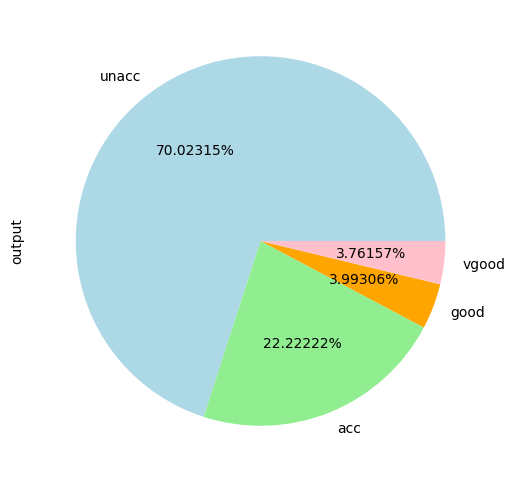

In [42]:
# 예제 데이터셋 분포
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind = 'pie', autopct='%0.05f%%', colors=['lightblue','lightgreen','orange','pink'])

In [44]:
# 데이터 전처리
# 데이터를 범주형 타입으로 변환
categorical_columns = ['price','maint','doors','persons','lug_capacity','safety'] # 예제 데이터셋 칼럼들의 목록
for category in categorical_columns:
  dataset[category] = dataset[category].astype('category') #astype() 메서드를 이용하여 데이터를 범주형으로 변환

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price,maint,doors,persons,lug_capacity,safety],1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [45]:
#배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [47]:
#레이블(output)로 사용할 칼럼을 텐서로 변환
outputs = pd.get_dummies(dataset.output) #get_dummies:가변수로 만들어주는 함수
outputs = outputs.values
outputs = torch.tensor(outputs).flatten() #1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [53]:
# 범주형 칼럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50,(col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [54]:
print(categorical_column_sizes)

[4, 4, 4, 3, 3, 3]


In [55]:
#데이터셋 분리(훈련, 테스트)
total_records = 1728
test_records = int(total_records * .2) # 전체 데이터 중 20%를 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

In [58]:
print(len(categorical_train_data))
print(len(categorical_test_data))
print(len(train_outputs))
print(len(test_outputs))

1383
345
1383
345


In [63]:
# 모델 네트워크 생성
class Model(nn.Module):
  def __init__(self, embedding_size, output_size, layers, p=0.4):
    super().__init__()
    self.all_embeddings = nn.ModuleList([nn.Embedding(ni,nf) for ni, nf in embedding_size])
    self.embedding_dropout = nn.Dropout(p)

    all_layers = []
    num_categorical_cols = sum((nf for ni, nf in embedding_size))
    input_size = num_categorical_cols #입력층의 크기를 찾기 위해 범주형 칼럼 개수를 input_size 변수에 저장

    for i in layers:
      all_layers.append(nn.Linear(input_size,i))
      all_layers.append(nn.ReLU(inplace=True))
      all_layers.append(nn.BatchNorm1d(i))
      all_layers.append(nn.Dropout(p))
      input_size = i

    all_layers.append(nn.Linear(layers[-1], output_size))
    self.layers = nn.Sequential(*all_layers)

  def forward(self, x_categorical):
    embeddings = []
    for i,e in enumerate(self.all_embeddings):
      embeddings.append(e(x_categorical[:,i]))
      x = torch.cat(embeddings,1)
      x = self.embedding_dropout(x)
      x = self.layers(x)
      return x


In [64]:
# model 클래스의 객체 생성
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [66]:
#모델의 파라미터 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [67]:
#cpu/gpu 사용지정
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [ ]:
#ahepf